<h1><b><center>Queimadas no Brasil entre 1998 e 2017</center></b></h1>

---
<font size="2" face="Verdana">Os Cientistas pelo mundo, sempre estão alertando a sociedade sobre os perigos dos **incêndios florestais**. Tais queimadas degradam espécies de flora e fauna, causando um gigantesco desequilibrio ambiental.

O **Basil** é o portador da maior floresta equatorial do mundo, localizada no norte do pais, a **Floresta Amazônica** abrange os territórios dos estados como o Amazonas, Amapá, Acre, Pará, Roraima e Rondônia. Além disso ocupa algumas regiões de outros paises como Bolívia, Colômbia, Equador, Guiana Inglesa, Guiana Francesa, Suriname e Venezuela.

Todo ano surgem notícias sobre queimadas por todo pais, os motivos vão desde acidentes naturais à ações humanas. O Brasil acompanha e registra tais queimadas durante vários anos, fazendo o registro quando elas ocorrem, pelo menos na maioria das vezes. Com base em uma desses bancos de dados farei uma análise dos dados a fim de identificar algumas informações sobre o assunto.

 
Por: Felipe Alves Cardozo
</font>

<p  align=center><br><img src='https://image.volunteerworld.com/5abcca70bb34f9ceb7ccca8f131feffbe804c624/amazon-rainforest-banner.jpg?auto=format&crop=faces&fit=crop&h=410&w=1230' widht='100%' hight='40%'></p>

# Importação dos Dados

<font size="2" face="Verdana">Neste Projeto, irei analisar os dados das **Queimadas no Brasil entre 1998 e 2017** a partir da base de dados disponibilizada no kaggle, buscarei uma visão ampla dos dados, respondendo perguntas como:

* Qual o Ano com maior e menor quantidade de ocorrências?
* Qual o Estado com maior e menor quantidade de ocorrências? 
* Qual o Mês com maior e menor quantidade de ocorrências?
* Os estados mais afetados?

Além de outras perguntas...
    
Farei também algumas representações gráficas dos dados, seguindo a convenção de **Storytelling**, proposta pela autora Cole Nussbaumer Knaflic, em seu livro de nome **Storytellyng com Dados**

Os dados podem ser obtidos clicando neste [Link](https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil)
</font>

<font size="2" face="Verdana">O primeiro passo é a Importação das bibliotecas a serem utilizadas, no caso do presente projeto, importaremos a biblioteca **Pandas** e a **Matplotlib** </font>

In [1]:
# Importando as Bibliotécas 
import pandas as pd
import matplotlib.pyplot as plt

<font size="2" face="Verdana">O Dataset no qual trabalharei é composto por um arquivo com **Cinco** colunas, compondo as informações relatos de ocorrencia de incêndio, das quais tem como significado:

**Dicionário das Variáveis**

1. `year:` Ano em que foram relatados os incêndios.
2. `state:` Estado brasileiro em que ocorreram os incêndios.
3. `month:` Mês em que foram relatados os incêndios.
4. `number:` Número de incêndios florestais relatados.
5. `date:` Data em que os incêndios florestais foram relatados.
    
</font>    

In [2]:
# Importando a base de dados
df = pd.read_csv("amazon.csv", encoding='latin1')

# Exibindo o dataset
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# Análise Exploratória dos Dados

O Dataset em questão possui **6454** linhas e **5** colunas, representando dados de quase **20 anos**, sendo de **1998** à **2017**.

In [3]:
# Exibindo informações de Dimensão dos dados
print("DIMENSÕES DO DATAFRAME:\n")
print(f"O Dataframe possui {df.shape[0]} linhas")
print(f"O Dataframe possui {df.shape[1]} colunas")

DIMENSÕES DO DATAFRAME:

O Dataframe possui 6454 linhas
O Dataframe possui 5 colunas


<font size="2" face="Verdana">Utilizando o método **info()** vemos que o Dataset possui valores completos, ou seja, não possui valores nulos, este é um resumo mais abrangente das informações dos dados, destacando o índice, o nome, a contagem total de valores não nulos e os tipos de cada coluna, nesta respectiva ordem.</font>

In [4]:
# Imprimindo o resumo geral das informações do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


<font size="2" face="Verdana">Por se tratar de quantidade de relatos, não faz sentido a coluna **number** ser do tipo float, sendo assim, converterei as informações para o tipo inteiro, onde, será mais consizente com a realidade. </font>

In [5]:
# Convertendo a coluna referente ao Número de Relatos para valor inteiro
df['number'] = df.number.astype('int64')

<font size="2" face="Verdana">Para garantir que realmente não existe nenhum valor nulo, aplicarei o método **isnull()**, somando dessa forma, tais valores, tendo como resultado a confirmação da **não existência de valores nulos.** </font>   

In [6]:
# Somando os valores nulos do Dataset
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

<font size="2" face="Verdana">Com as análises anteriores, podemos observar que a coluna **date**, apesar de estar com a formatação conforme o padrão **yyyy-mm-dd**, porém, vemos que o vaor correspondente ao dia e ao mês, estão com o valor **01** em ambos, tornando a coluna descartável.
    
Sendo assim, aplicarei o método **drop()** na coluna **date**
    
</font>    

In [7]:
# Removendo a coluna date
df = df.drop(['date'], axis=1)
df.head()

,year,state,month,number
0,1998,Acre,Janeiro,0
1,1999,Acre,Janeiro,0
2,2000,Acre,Janeiro,0
3,2001,Acre,Janeiro,0
4,2002,Acre,Janeiro,0


A próxima<font size="2" face="Verdana">A próxima etapa é a análise da coluna **state**, com o método **unique()**, onde são listados todos estados com registro de ocorrência, totalizando **23** estados.  </font>

In [8]:
# Verifiando os Valores da Coluna Estado
df['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

<font size="2" face="Verdana">Com isso, podemos observar que existe o estado **Rio**, mas não está claro a qual estado corresponde (Rio de Janeiro, Rio Grande do Sul ou Rio Grande do Norte), dessa forma, apesar de o estado **Rio** ser o estado que mais aparece no dataset, deletarei as linas correspondentes ao valor, dessa forma o dataset passa a ter **22 estados**.
</font>

In [9]:
df['state'].value_counts()

Rio                 717
Paraiba             478
Mato Grosso         478
Alagoas             240
Amapa               239
Minas Gerais        239
Bahia               239
Piau                239
Tocantins           239
Santa Catarina      239
Sao Paulo           239
Maranhao            239
Rondonia            239
Acre                239
Espirito Santo      239
Sergipe             239
Amazonas            239
Goias               239
Roraima             239
Distrito Federal    239
Pernambuco          239
Ceara               239
Pará                239
Name: state, dtype: int64

In [10]:
# Deletando o valor Rio
df.drop(df.loc[df['state'] == 'Rio'].index, inplace=True)

In [11]:
# Dataset após a remoção do Valor Rio
df['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rondonia', 'Roraima', 'Santa Catarina', 'Sao Paulo',
       'Sergipe', 'Tocantins'], dtype=object)

<font size="2" face="Verdana">Com o objetivo da melhor composição das informações gráficas, reduzirei os nomes dos estados para valores menores.</font>

In [12]:
# Renomeando os estados para simplificar as informações
estados = { 'Acre': 'AC',
            'Alagoas': 'AL',
            'Amapa': 'AP',
            'Amazonas': 'AM',
            'Bahia': 'BA',
            'Ceara': 'CE',
            'Distrito Federal': 'DF',
            'Espirito Santo': 'ES',
            'Goias': 'GO',
            'Maranhao': 'MA',
            'Mato Grosso': 'MT',
            'Minas Gerais': 'MG',
            'Paraiba': 'PB',
            'Pará': 'PA',
            'Pernambuco': 'PE', 
            'Piau': 'PI',
            'Rondonia': 'RO',
            'Roraima': 'RR',
            'Santa Catarina': 'SC',
            'Sao Paulo': 'SP',
            'Sergipe': 'SE',
            'Tocantins': 'TO'
}

df['state'] = df.state.map(estados)

<font size="2" face="Verdana">A Próxima etapa da análise é a impressão do resumo estatístico das colunas com valores numéricos utilizando o método **describe()**, nesse caso temos duas colunas, uma correspondente ao ano e outra correspondente ao número de relatos. 
    
No caso do ano do relato, não faz sentido o resumo estatístico então farei a descrição apenas da coluna **number**

</font>

In [13]:
stats = df['number']
pd.DataFrame(stats.describe())

,number
count,5737.000000
mean,113.890709
std,197.636099
min,0.000000
25%,3.000000
50%,24.000000
75%,122.000000
max,998.000000


<font size="2" face="Verdana">Após a deleção das informações desnecessárias o dataset passa a ter **5.737 linhas** e **4 colunas**</font>

In [14]:
# Exibindo informações de Dimensão dos dados
print("DIMENSÕES DO DATAFRAME:\n")
print(f"O Dataframe possui {df.shape[0]} linhas")
print(f"O Dataframe possui {df.shape[1]} colunas")

DIMENSÕES DO DATAFRAME:

O Dataframe possui 5737 linhas
O Dataframe possui 4 colunas


<font size="2" face="Verdana">Em seguida, farei uma análise da coluna **month**, onde, observo que não existem valores faltantes ou repetidos, completando assim os doze meses, para melhor composição das informações gráficas, reduzirei os nomes dos meses da coluna.</font>

In [15]:
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [16]:
# Renomeando os meses para simplificar as informações
meses = {'Janeiro':'Jan' ,
         'Fevereiro':'Fev',
         'Março':'Mar',
         'Abril':'Abr',
         'Maio':'Mai',
         'Junho':'Jun',
         'Julho':'Jul',
         'Agosto':'Ago',
         'Setembro':'Set',
         'Outubro':'Out',
         'Novembro':'Nov',
         'Dezembro':'Dez'
}

df['month'] = df.month.map(meses)

<font size="2" face="Verdana">Feito essas alterações, a fim de confirmar os ajustes nos dados, vou imprimir os 5 primeiros e os 5 últimos valores do dataset, dessa forma, vemos que as informações estão todas de acordo com a alteração estabelecida.</font>

In [17]:
# Imprimindo os 5 primeiros valores do dataset
df.head()

,year,state,month,number
0,1998,AC,Jan,0
1,1999,AC,Jan,0
2,2000,AC,Jan,0
3,2001,AC,Jan,0
4,2002,AC,Jan,0


In [18]:
# Imprimindo os 5 ultimos valores do dataset
df.tail()

,year,state,month,number
6449,2012,TO,Dez,128
6450,2013,TO,Dez,85
6451,2014,TO,Dez,223
6452,2015,TO,Dez,373
6453,2016,TO,Dez,119


In [19]:
# Exibindo o dataset após a conversão
df.head()

,year,state,month,number
0,1998,AC,Jan,0
1,1999,AC,Jan,0
2,2000,AC,Jan,0
3,2001,AC,Jan,0
4,2002,AC,Jan,0


# Respondendo Algumas Perguntas

<font size="2" face="Verdana">Agora iremos responder aquelas perguntas principais do início da análise: </font>

## **01 - Qual o Ano com maior quantidade de ocorrências?**

<font size="2" face="Verdana"> Primeiro, definirei as cores padrões a serem utilizadas nos gráfico, seguindo as melhores práticas de storytelling, nesse utilizaremos as cores vermelha e cinza, pois o assunto é bem grave. </font>

In [21]:
# Definindo variáveis de cores dos gráficos
azul = '#3c2a4d'
cinza = '#a9a9a9'
vermelho = '#740017'

<font size="2" face="Verdana">Para esta primeira pergunta, será necessário a criação de um novo dataset, especificando os valores de **number** e **year** </font>

In [20]:
# Criando um novo dataset de números por anos
number_by_year = df[['number','year']]
number_by_year = number_by_year.groupby('year').sum()
number_by_year

,number
year,
1998,18850
1999,25839
2000,26691
2001,28199
2002,34424
2003,39299
2004,34990
2005,32687
2006,31318


<font size="2" face="Verdana"> A primeira representação serve para responder a primeira pergunta, com isso vemos que o ano com a maior quantidade de relatos foi o ano **2003** com **39.299** relatos, tais registros englobam um total de **22 estados** que constam no dataset.

Apesar de **2003** possuir a maior quantidade de relatos, podemos ver que em anos posteriores houveram picos de altos níveis de registro como em **2009** com **37.382**, **2012** com **37.846**, **2015** com **38.631** e **2016** com **38.760** registros</font>

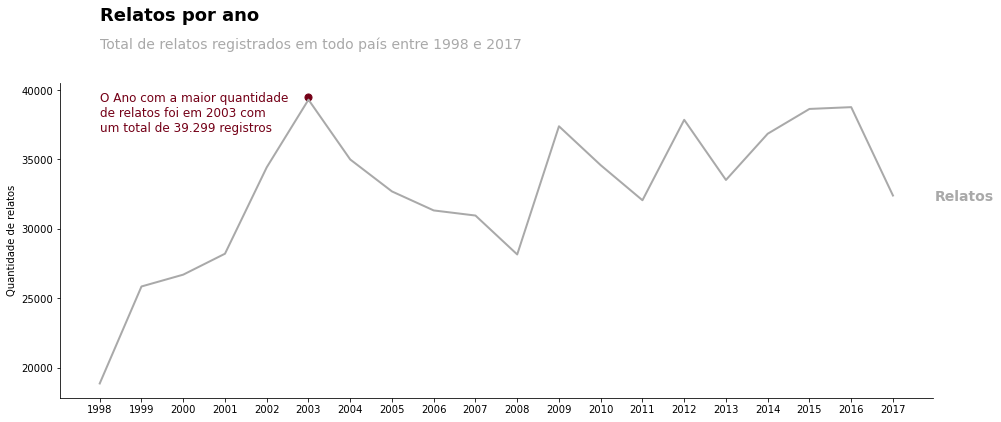

In [22]:
# Plotar o total de relatos durante os anos
fig, ax = plt.subplots(figsize=(14,6))
number_by_year.plot(kind='line', ax=ax, color=cinza, linewidth = 2)
ax.set_ylabel('Quantidade de relatos')
ax.set_xlabel(None)
ax.set_xticks(df['year'].unique())
ax.get_legend().remove()

# Remover os grids
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Legenda
plt.text(2018, 32052,
        "Relatos",
        fontsize=14,
        weight='bold',
        color=cinza)

# Título
plt.text(1998,45000,
        "Relatos por ano",
        fontsize=18,
        color='black',
        weight='bold')

# Subtítulo
plt.text(1998,43000,
        "Total de relatos registrados "
        "em todo país entre 1998 e 2017",
        fontsize=14,
        color=cinza)

# Texto em destaque
plt.text(1998,37000,
        "O Ano com a maior quantidade\n"
        "de relatos foi em 2003 com \n"
        "um total de 39.299 registros",
        fontsize=12,
        color=vermelho)

plt.xticks(rotation = 0, ha = 'center')
ax.scatter(x=2003, y=39500, s=50, color=vermelho)
plt.tight_layout()

## **02 - Qual o Ano com menor quantidade de ocorrências?**

<font size="2" face="Verdana">Observando o gráfico vemos uma ascensão dos registros a partir do primeiro ano, ou seja, iniciando em **1998**, mas vemos que o valor não se inicia a partir do zero, dessa forma para melhor detalhe, filtramos  os dados especificando o ano de **1998** e obtemos o valor **18.850** de registros, sendo este o menos valor do dataset </font>

In [24]:
number_min = number_by_year.loc[number_by_year['number'] == number_by_year['number'].min()]
number_min

,number
year,
1998,18850


## **03 - Qual o Estado com maior quantidade de ocorrências?**

<font size="2" face="Verdana"> Conforme observado anteriormente, o dataset é composto por **22 estados**, para identificar o estado com maior número de ocorrências, criarei um novo dataset com as informações da coluna **number** e **state** agrupados pela quantidade de registros. </font>

In [25]:
number_by_state = df[['number','state']]
number_by_state = number_by_state.groupby('state').sum().sort_values(by ='number', ascending = False)
number_by_state

,number
state,
MT,96178
PB,52432
SP,51118
BA,44718
PI,37777
GO,37677
MG,37453
TO,33675
AM,30636


<font size="2" face="Verdana"> Como resultado, podemos observar no gráfico que o estado com a maior quantidade de registro é o **Mato Grosso**, é um fato curioso por conta do seu bioma ser o pantanal, característico por sua planície inundada, o que mostra os efeitos da ação humana na destruição da vegetação natural com, por exemplo, adubos químicos e o dematamento.

<p  align=center><br><img src='mapa-do-brasil.png' ></p>    
    
    
    
Vemos que **Mato Grosso - MT** possui um total de **96.178** relatos de incêndios, com quase o dobro de registros do segundo lugar, o estado da **Paraiba - PB** com **42.432** registros.</font>

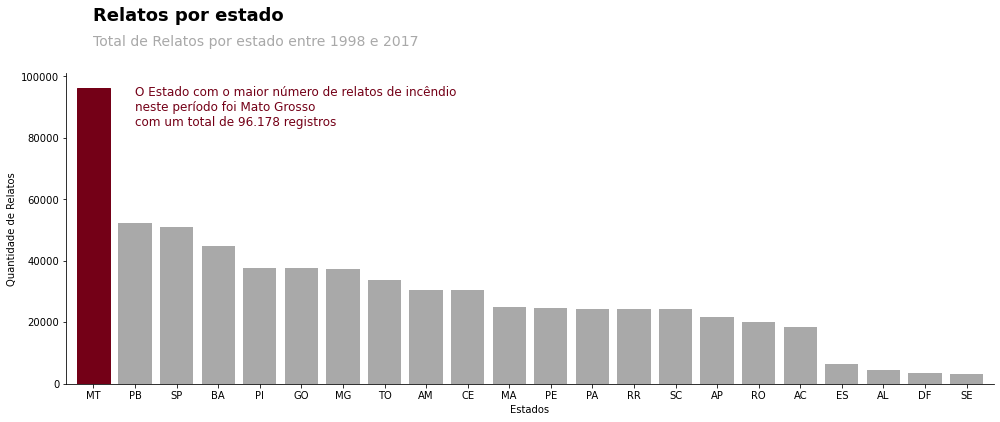

In [27]:
# Plotar o total de relatos por estado
fig, ax = plt.subplots(figsize=(14,6))
number_by_state.plot(kind='bar', width=0.8, ax=ax, color=cinza)
ax.set_ylabel('Quantidade de Relatos')
ax.set_xlabel('Estados')
ax.get_legend().remove()

# Removendo o grid
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Título
plt.text(0, 118000,
        "Relatos por estado", 
        fontsize=18,
        color='black', 
        weight='bold')

# Subtítulo
plt.text(0, 109900,
        "Total de Relatos por estado entre 1998 e 2017",
        fontsize=14,
        color=cinza)

# Texto em destaque
plt.text(1, 84000,
        "O Estado com o maior número de relatos de incêndio\n"
        "neste período foi Mato Grosso\n"
        "com um total de 96.178 registros",
        fontsize=12,
        color=vermelho)

plt.xticks(rotation=0, ha='center')
ax.get_children()[0].set_color(vermelho)
plt.tight_layout()

## **04 - Qual o Estado com menor quantidade de ocorrências?**

<font size="2" face="Verdana">No gráfico, observamos que o estado com a menor quantidade de registros é o **Sergipe - SE**, detalhei o estado com um filtro para identificar os registros e observamos que essa região possui o valor de **3.237** relatos. 

Vemos um sentido neste resultado pois o estado é o menor do Brasil, além de se encontrar na costa atlãntica do nordeste, é cortado pelo Rio São Francisco.</font>

In [28]:
state_min = number_by_state.loc[number_by_state['number'] == number_by_state['number'].min()]
state_min

,number
state,
SE,3237


## **05 - Qual o Mês com maior quantidade de ocorrências?**

<font size="2" face="Verdana"> Para identificar o mês com o maior número de registros de incêndios, criei um novo dataset com as colunas **number** e **month**, agrupando dessa forma os valores por mês.</font>

In [29]:
number_by_month = df[['number','month']]
number_by_month = number_by_month.groupby('month').sum().sort_values(by='number', ascending = True)
number_by_month

,number
month,
Abr,26902
Mar,29406
Fev,29567
Mai,33645
Jan,45299
Set,48296
Dez,53800
Jun,54731
Ago,80243


<font size="2" face="Verdana"> Gerando o gráfico podemos observar que o mês de **Julho** é o mês que mais registra incêndios com **88.453** relatos, precedido dos meses de Outubro com **82.068**, Novembro com **80.981** e Agosto com **80.243**, correspondendo ao **Segundo semestre do ano**. </font>

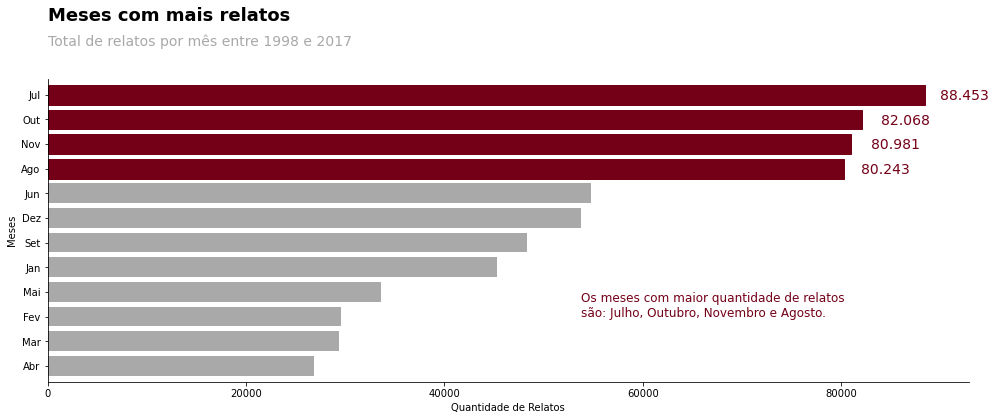

In [31]:
fig, ax = plt.subplots(figsize=(14,6))
number_by_month.plot(kind='barh', width=0.8, ax=ax, color=cinza)
ax.set_ylabel('Meses')
ax.set_xlabel('Quantidade de Relatos')
ax.get_legend().remove()

# Remover grid
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Título
plt.text(0, 14, 
        "Meses com mais relatos",
        fontsize=18,
        color='black',
        weight='bold')

# Subtítulo
plt.text(0,13,
        "Total de relatos por mês entre 1998 e 2017",
        fontsize=14,
        color=cinza)

# Valor de destaque
plt.text(90000, 10.8,
        "88.453",
        fontsize=14,
        color=vermelho)

plt.text(84000, 9.8,
        "82.068",
        fontsize=14,
        color=vermelho)

plt.text(83000, 8.8,
        "80.981",
        fontsize=14,
        color=vermelho)

plt.text(82000, 7.8,
        "80.243",
        fontsize=14,
        color=vermelho)

# Texto em destaque
plt.text(53800, 2,
        "Os meses com maior quantidade de relatos\n"
        "são: Julho, Outubro, Novembro e Agosto.",
        fontsize=12,
        color=vermelho)

plt.xticks(rotation = 0, ha='center')
ax.get_children()[11].set_color(vermelho)
ax.get_children()[10].set_color(vermelho) 
ax.get_children()[9].set_color(vermelho) 
ax.get_children()[8].set_color(vermelho) 
plt.tight_layout()

## **06 - Qual o Mês com menor quantidade de ocorrências?**

<font size="2" face="Verdana">No gráfico, observamos que mês com a menor quantidade de relatos é **Abril**, detalhando e filtrando as informações, obtemos o total de **26.902** registros.</font>

In [32]:
month_min = number_by_month.loc[number_by_month['number'] == number_by_month['number'].min()]
month_min

,number
month,
Abr,26902


In [ ]:
df['number'].sum()

# Detalhando o Estado mais Afetado

<font size="2" face="Verdana"> Conforme visto anteriormente, o estado do **Mato Grosso**, registrou a maior quantidade de relatos, com isso, detalharei os registros deste estado.

Primeiro filtrei o dataset especificando o estado no MT e criei um novo dataset denominado **mt_year**, nele agrupei três colunas, **state**, **year** e **number** agrupados pelo ano.</font>

In [33]:
mt_year = df[['state','year','number']]
mt_year = mt_year[mt_year['state'] == 'MT'].groupby(by=['year']).sum()
mt_year

,number
year,
1998,2399
1999,2975
2000,3896
2001,3084
2002,3660
2003,6937
2004,4806
2005,5382
2006,4284


<font size="2" face="Verdana">Representando os dados no gráfico, podemos observar que a maior quantidade de relatos ocorreu em **2009** com um total de **8.187** registros, sendo prosseguido por uma leve queda nos três anos seguintes, com um leve aumento nos anos seguintes.

É interessante observar que de **2008** a **2009** houve um grande salto representando mais que o dobro de registros, algo que se torna bem preocupante, pois a degradação é alta em tão pouco tempo.
</font>

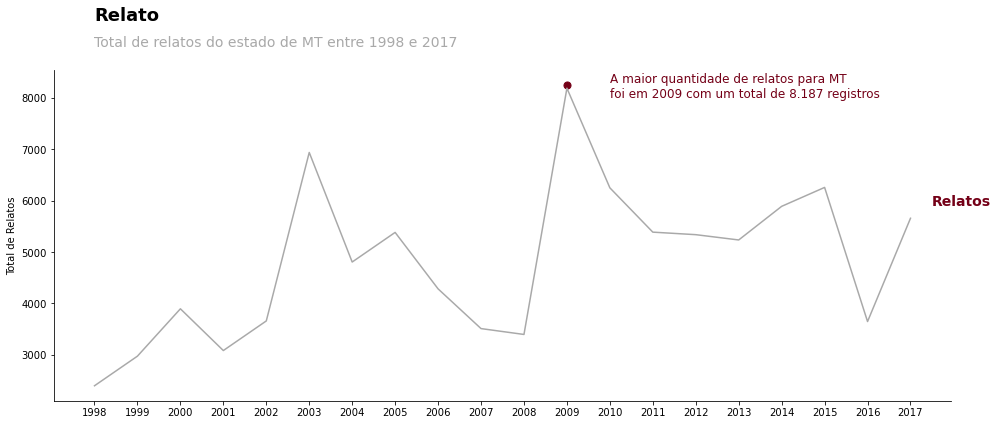

In [34]:
# Plotar o total de relatos para o estado de MT

fig, ax = plt.subplots(figsize=(14,6))
mt_year.plot(kind='line', ax=ax, color=cinza)
#am_year.plot(kind='line', ax=ax, color=cinza)
ax.set_ylabel('Total de Relatos')
ax.set_xlabel(None)
ax.set_xticks(df['year'].unique())
ax.get_legend().remove()

# Remover os grids
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Legenda
plt.text(2017.5,5900,
        "Relatos",
        fontsize=14,
        weight='bold',
        color=vermelho)

# Título
plt.text(1998,9500,
        "Relato",
        fontsize=18,
        weight='bold',
        color='black')

# Subtítulo
plt.text(1998,9000,
        "Total de relatos do estado de MT entre 1998 e 2017",
        fontsize=14,
        color=cinza)

# Texto em destaque
plt.text(2010,8000,
        "A maior quantidade de relatos para MT\n"
        "foi em 2009 com um total de 8.187 registros",
        fontsize=12,
        color=vermelho)

ax.scatter(x=2009, y=8250, s=50, color=vermelho)
plt.xticks(rotation = 0, ha = 'center')
plt.tight_layout()

<font size="2" face="Verdana"> Seguindo com a representação gráfica dos dados especificamente do estado de MT, gerei um dataset referente aos dados mensais, com as colunas **state**, **month**, **number** agrupados pela ultima citada, buscando enteder qual o nível de relatos mais detalhadamente. </font>

In [43]:
mt_month = df[['state','month','number']]
mt_month = mt_month[mt_month['state'] == 'MT'].groupby(by=['month']).sum().sort_values('number', ascending=True)
mt_month

,number
month,
Set,1598
Ago,4714
Jun,7084
Jul,7455
Fev,7456
Dez,7593
Mar,9613
Out,9913
Abr,9952


<font size="2" face="Verdana"> Com essa divisão dos dados podemos observar que a maior quantidade relatos de **1998** a **2017** foram nos meses de Janeiro, Novembro, Maio, Abril, Outubro e Março, ou seja, os maiores casos ocorreram no fim e inicio do ano e nos meses subsequentes, englobando todo o verão. </font>

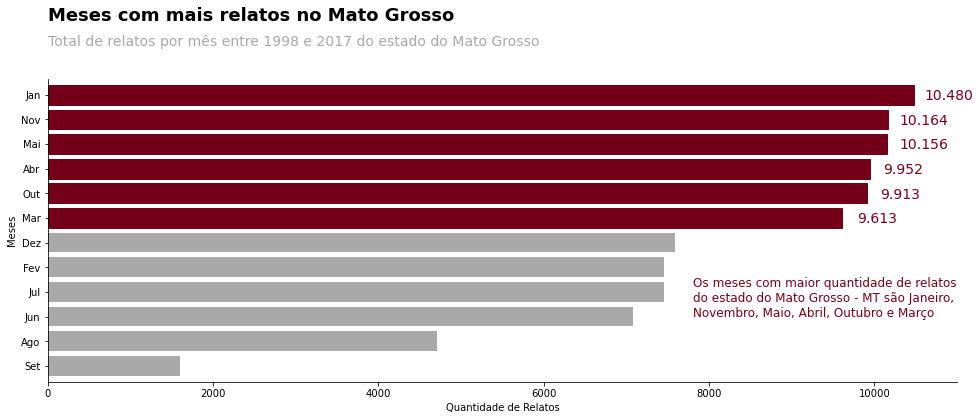

In [70]:
fig, ax = plt.subplots(figsize=(14,6))
mt_month.plot(kind='barh', width=0.8, ax=ax, color=cinza)
ax.set_ylabel('Meses')
ax.set_xlabel('Quantidade de Relatos')
ax.get_legend().remove()

# Remover grid
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Título
plt.text(0, 14, 
        "Meses com mais relatos no Mato Grosso",
        fontsize=18,
        color='black',
        weight='bold')

# Subtítulo
plt.text(0,13,
        "Total de relatos por mês entre 1998 e 2017 do estado do Mato Grosso",
        fontsize=14,
        color=cinza)

# Valor de destaque
plt.text(10600, 10.8,
        "10.480",
        fontsize=14,
        color=vermelho)

plt.text(10300, 9.8,
        "10.164",
        fontsize=14,
        color=vermelho)

plt.text(10300, 8.8,
        "10.156",
        fontsize=14,
        color=vermelho)

plt.text(10100, 7.8,
        "9.952",
        fontsize=14,
        color=vermelho)

plt.text(10070, 6.8,
        "9.913",
        fontsize=14,
        color=vermelho)

plt.text(9790, 5.8,
        "9.613",
        fontsize=14,
        color=vermelho)

# Texto em destaque
plt.text(7800, 2,
        "Os meses com maior quantidade de relatos\n"
        "do estado do Mato Grosso - MT são Janeiro,\n" 
        "Novembro, Maio, Abril, Outubro e Março",
        fontsize=12,
        color=vermelho)

plt.xticks(rotation = 0, ha='center')
ax.get_children()[11].set_color(vermelho)
ax.get_children()[10].set_color(vermelho) 
ax.get_children()[9].set_color(vermelho) 
ax.get_children()[8].set_color(vermelho) 
ax.get_children()[7].set_color(vermelho) 
ax.get_children()[6].set_color(vermelho) 
plt.tight_layout()

# Conclusão

<font size="2" face="Verdana"> Todos sabemos que a maioria das queimadas são causadas por atividades criminosas em busca de abrir espaços naquelas regiões, para pasto e plantio. O Brasil como um todo a cada ano enfrenta cada vez mais esse tipo de problema. O Desmatamento e a degradação da fauna e flora precisam ser combatidos e investigar e analisar os dados são fundamentais para entender a sitação e aplicar melhorias no combate a esse tipo de crime.
    
Com a base de dados utilizada, foi possível obter algumas conclusões:
<br><br>
* Podemos observar que com o decorrer dos anos, a frequência de queda nos relatos vem diminuindo, isso mostra um crescimento gradual no número de incêndios.
* Vemos também que ao analisar todo o país, não existe uma frequência clara de ocorrência no verão, que deveria se o mês com mais relatos, no entanto, percebemos que as maiores ocorrências foram antes dessa estação.
* O estado do Mato Grosso é o mais afetado de acordo com os dados do dataset, mesmo tendo o bioma pantanal, característico por alagamentos, o que acaba sendo contraditório, o que pode ser explicado por crimes ambientais, por ser uma região fertil.
    
Com isso concluo a análise
</font>